In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler #Used to normalize or standardize data before applying DBSCAN

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
#  Elbow Method for KMeans
wcss = [] # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

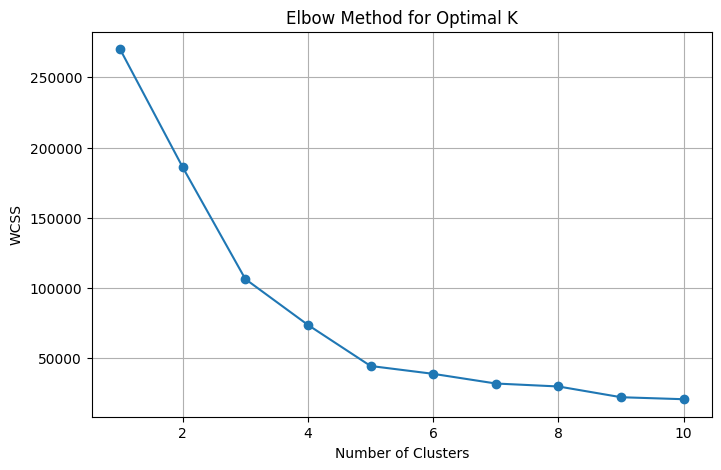

In [ ]:
#  Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
#  KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
data['KMeans_Cluster'] = kmeans.fit_predict(X)

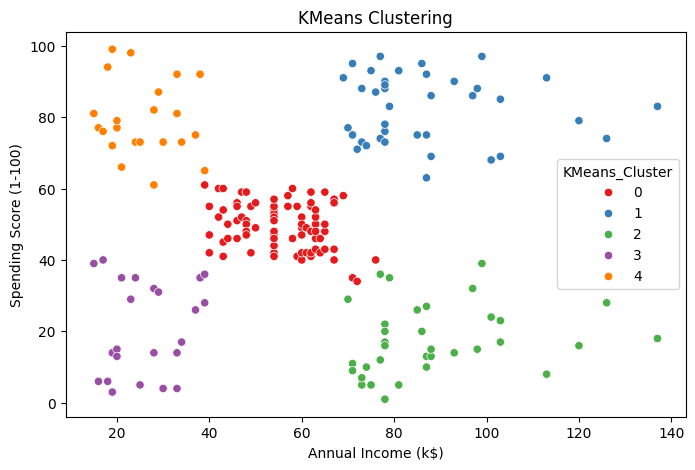

In [ ]:
#  KMeans Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='KMeans_Cluster', data=data, palette='Set1')
plt.title('KMeans Clustering')
plt.show()

In [ ]:
#  Standardize Features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#  DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

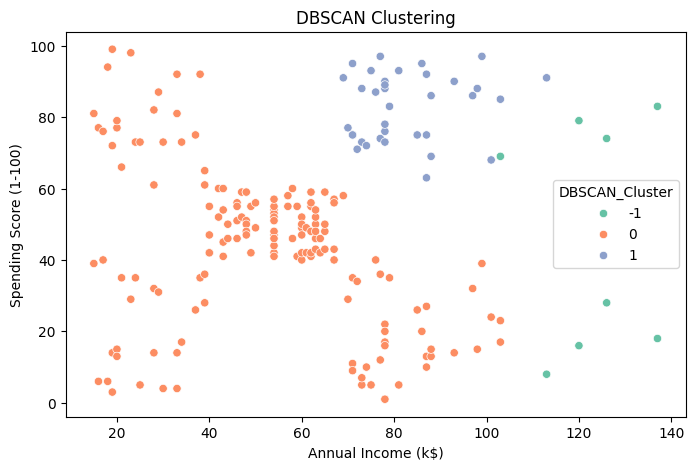

In [ ]:
#  DBSCAN Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='DBSCAN_Cluster', data=data, palette='Set2')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
#  Summary
print("KMeans Clusters:", data['KMeans_Cluster'].nunique())
print("DBSCAN Clusters (excluding -1/outliers):", len(set(data['DBSCAN_Cluster'])) - (1 if -1 in data['DBSCAN_Cluster'].values else 0))

KMeans Clusters: 5
DBSCAN Clusters (excluding -1/outliers): 2
